In [1]:
%%time
import warnings

import proplot as plot
import sys
import glob
import cmaps
import pandas as pd
import numpy as np
import salem
import xarray as xr

import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import ticker, cm


from getchinamap.getchinamap import DownloadChmap
chinamap_engine = DownloadChmap()#(adcode_file='/home/xuejingkai/data/down/AMap_adcode_citycode_20210406.csv')
provinces = chinamap_engine.download_country(target='省')



plt.rcParams['font.sans-serif'] = ['Arial'] 
plt.rcParams['axes.unicode_minus'] = False 


import warnings
warnings.filterwarnings("ignore")
plot.rc['figure.facecolor'] = 'white'

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


CPU times: user 1.97 s, sys: 1.42 s, total: 3.39 s
Wall time: 8.15 s


In [2]:
# !unzip -d ./font/Roboto ./font/Roboto.zip
# !unzip -d ./font/Arial ./font/arial.zip

import matplotlib.pyplot as plt
from matplotlib import font_manager

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# font_manager.fontManager.addfont('./Arial.ttf')
# #plt.rcParams['font.sans-serif'] = "Arial"
# plt.rcParams["font.family"] = "sans-serif"
# plt.rcParams['font.sans-serif'] = "Arial"

# # plt.rcParams["font.family"] = "sans-serif"
# # plt.rcParams["font.sans-serif"] = 'DejaVu Sans'#["Nimbus Sans"]


from matplotlib import font_manager

font_dirs = ['/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    print(font_file)
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams["font.family"] = "Arial"
import proplot as plot

/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/ARIALBLACKITALIC.TTF
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/ArialCE.ttf
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/arialceb.ttf
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/ARIALLGTITL.TTF
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/ARIAL.TTF
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/ARIBLK.TTF
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/ArialMdm.ttf
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/ARIALI 1.TTF
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/ARIALNB.TTF
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/ArialCEBoldItalic.ttf
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/ArialCEItalic.ttf
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/font/Arial/ArialMdmItl.ttf
/exports/d4/xuejingkai/atmos/jupyter2/HCHO/plotmapv2/fo

In [3]:
timedt=pd.date_range('20220901','20221001')

In [4]:
L=[glob.glob(f'/exports/d4/xuejingkai/down/guokongzhandian/china_sites_{t.strftime("%Y%m%d")}*')[0] for t in timedt]

In [5]:
#L=glob.glob(f'/exports/d4/xuejingkai/down/guokongzhandian/china_sites_{timedt[0].strftime("%Y%m%d")}*')
L=[glob.glob(f'/exports/d4/xuejingkai/down/guokongzhandian/china_sites_{t.strftime("%Y%m%d")}*')[0] for t in timedt]
L.sort()
sites=pd.read_excel('/exports/d4/xuejingkai/guokongzhan_nc/sites.xlsx')
sites.columns=['id','name','city','lon','lat','p']
sites['lon'] = sites['lon'].replace('-', np.nan)
sites.dropna(subset=['lon'], inplace=True)
sites['lat']=sites.lat.astype(float)

D=[]
times=[]
for l in L[:]:
    
    df=pd.read_csv(l)
    # 将"date"列转换为字符串，并保留8个字符（年月日）
    #df["date"] = df["date"].astype(str).str[:8]

    # 将"hour"列转换为字符串，并保留2个字符（小时）
    #df["hour"] = df["hour"].astype(str).str.zfill(2)

    # 将"date"和"hour"列相加，并使用to_datetime函数将其转换为datetime格式
    df["date"] = pd.to_datetime(df["date"].astype(str).str[:8] + df["hour"].astype(str).str.zfill(2), format="%Y%m%d%H")
    for n in range(23,24):  #一般是23点的O3是当天的O3_8h_24h
        try:
            dfq=df.query(f"type == 'O3_8h_24h' and hour == {df.hour.max()}")
            timedt0=dfq['date']
            timedt0=pd.to_datetime(timedt0.values[0])
            d1=dfq.T.reset_index().iloc[3:]
            #d2.rename({'index':'h'})
            d1.columns=['id','value']
            d1['value']=d1.value.astype(float)
            d2=pd.merge(sites,d1,how='left')

            lat=d2.lat.values
            lon=d2.lon.values
            vcd=d2.value.values
            slat=d2.lat.values
            slon=d2.lon.values
            D.append(vcd)
            times.append(timedt0)
            print(l)
        except:
            pass

/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220901.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220902.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220903.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220904.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220905.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220906.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220907.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220908.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220909.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220910.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220911.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220912.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220913.csv
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20220914.csv
/exports/d4/xuejingkai/down/guokon

In [6]:
dss=xr.DataArray(np.array(D)
                    ,
        coords={
            'time':timedt,#times,#timedt[n1:n2],
            'point':np.arange(np.array(D).shape[1]),

        },
        dims=['time','point'])

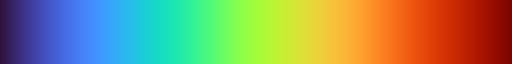

In [7]:
cmap2=plot.Colormap('turbo')
cmap=cmap2#my_cmap
cmap

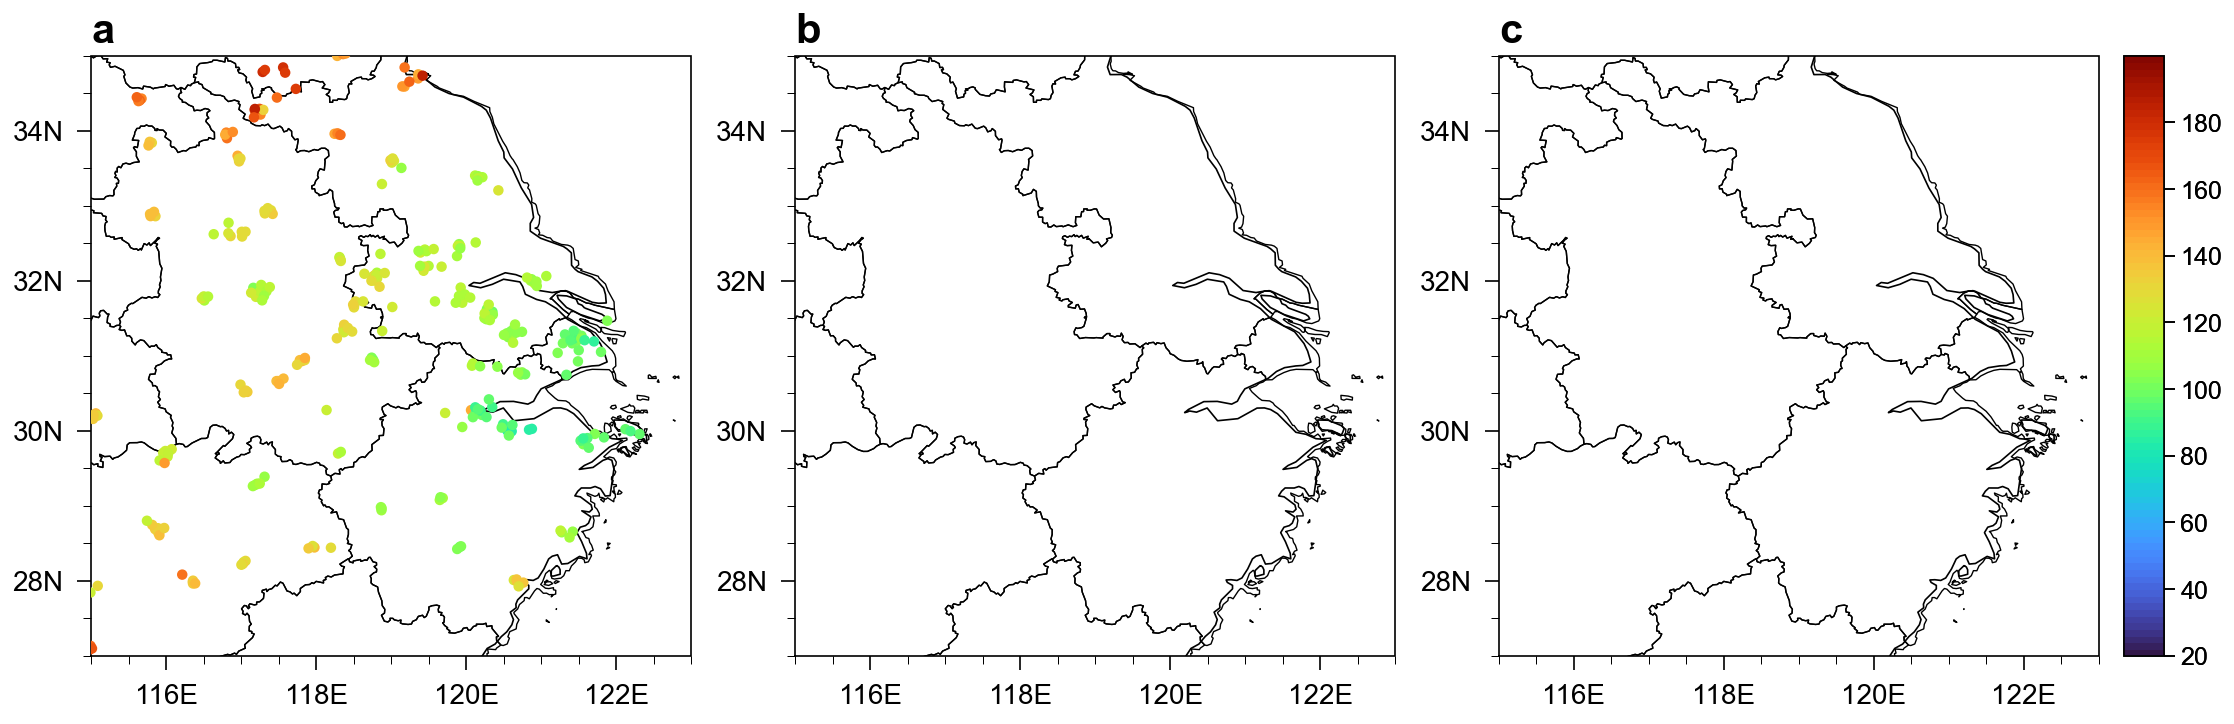

In [10]:
def plot_map(gdf_polygons,ax,lw=1,color='k',linestyle='--',**kwargs):
    from matplotlib.collections import PatchCollection
    from descartes import PolygonPatch
    from shapely.geometry import Point
    patches = [PolygonPatch(geometry) for geometry in gdf_polygons['geometry']]
    pc = PatchCollection(patches, facecolor='none', linewidth=lw
                         , alpha=1,linestyle=linestyle,edgecolors=color,**kwargs)
    #fig, ax = plot.subplots(figsize=(5,5))
    ax.add_collection(pc)
def plot_map(gdf_polygons,ax,proj,color='k',facecolor='none',linestyle='--',**kwargs):
    ax.add_geometries([g for g in gdf_polygons['geometry']],facecolor=facecolor,crs=proj,**kwargs)
    
def dwticks(ax,xticks,yticks):
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    ax.set_xticks(xticks,crs=proj) # set longitude indicators

    ax.set_yticks(yticks, crs=proj)
    lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f',degree_symbol='')
    lat_formatter = LatitudeFormatter(number_format='.0f',degree_symbol='')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.grid(False)
    ax.minorticks_on()
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
    
    ax.yaxis.set_major_locator(plt.MultipleLocator(2))   

    ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
    


def draw_style(ax):
    dwticks(ax,xtick,ytick)

    plot_map(eval(place),ax,lw=1,color='k',linestyle='--',zorder=2)
    #eval(place).boundary.plot(ax=ax,lw=1,color='k',linestyle='--',)
    
    
    ax.tick_params(which='major', width=metawidth, length=4,bottom=True,left=True
                      )#,right=False,top=False ,labelbottom=False ,labelleft=False )
    ax.tick_params(labelsize=10, pad=5)  
    ax.tick_params(which='minor', width=metawidth, length=4*0.6,bottom=True,left=True
                      )#,right=False,top=False ,labelbottom=False ,labelleft=False )
    
    ax.format(lonlim=(bounds2[0],bounds2[2]),latlim=(bounds2[1],bounds2[3])
             )#,title=place[0].upper()+place[1:],titlesize=15)
    
def dwticks(ax,xticks,yticks):
    ax.set_xticks(xticks,crs=proj) # set longitude indicators

    ax.set_yticks(yticks, crs=proj)
    lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f',degree_symbol='')
    lat_formatter = LatitudeFormatter(number_format='.0f',degree_symbol='')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.grid(False)
    ax.xaxis.set_major_locator(plt.MultipleLocator(2))
    
    ax.yaxis.set_major_locator(plt.MultipleLocator(2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))    
    
    
lat_begin = 27
lat_end = 35
lon_begin = 115
lon_end = 123



proj=plot.Proj('cyl')

metawidth=0.6
ticklabelpad=5
ytick=np.arange(lat_begin,lat_end+1,2)
xtick=np.arange(lon_begin,lon_end+1,2)



import matplotlib as mpl
#bounds=[n for n in np.arange(0.02,0.1,0.01)]+[n for n in np.arange(0.1,1,0.2)]
#bounds+=[n for n in np.arange(1,10,2)]
#bounds=np.array(bounds)*1e16
bounds = np.array([0.03,0.05,0.06,0.08,0.1,0.2,0.3,0.4,0.5,0.8,1,2,3,4,5])*1e16
bounds = np.array([0,0.05,0.06,0.1,0.2,0.3,0.4,0.5,0.8,1,2,3])*100#e16
bounds = np.arange(20,202,2)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

plt.rcParams['hatch.linewidth'] = 0.1
proj=plot.Proj('cyl')
labelsize=10



fig,axs=plot.subplots([ [1,2,3],

                        
                        #[6,6,5],
                            ],proj=proj#proj=[proj,'cartesian']
                      ,refwidth=3,share=False)

fig.format(abc=True,abcloc='l',abcsize=15,metawidth=metawidth)





vmax=3e16#2e15
vmin=0#-2e15

levels=51
style=np.linspace(vmin, vmax, num=levels)/1e16


ax=axs[0]
m=ax.scatter(slon,slat,c=dss.loc['20220902'],s=10,cmap=cmap,norm=norm,extend='neither',zorder=3
                ,levels=50)



# ax=axs[1]
# m=ax.pcolormesh(dsUSTC['pred_MDA8O3'][0].salem.roi(shape=provinces),levels=50,norm=norm,vmax=200,vmin=20,cmap=cmap)
# #ax.colorbar(m)


# ax=axs[2]
# m=ax.pcolormesh(dsTAP.M8H_O3,levels=50,norm=norm,vmax=200,vmin=20,cmap=cmap)
fig.colorbar(m,locator=np.arange(0,200,20))

for ax in axs:
    plot_map(provinces,ax=ax,proj=proj,lw=0.5,color='k',linestyle='--',)
    #ax.format(suptitle='NH3 from 2008-2020')#,title='NH3 total columns ')
    dwticks(ax,xtick,ytick)
    
    ax.tick_params(which='major', width=metawidth, length=5,bottom=True,left=True#,direction='in'
                      ,right=False,top=False )#,labelbottom=False ,labelleft=False )
    ax.tick_params(labelsize=10, pad=5) 
    
    
    ax.tick_params(which='minor', width=metawidth*0.6, length=3,bottom=True,left=True#,direction='in'
                      ,right=False,top=False )#,labelbottom=False ,labelleft=False )
    ax.tick_params(labelsize=10, pad=5) 


    ax.format(coast=True,grid=False,reso='med',labels=False,lonlim=(lon_begin,lon_end),latlim=(lat_begin,lat_end)
           #,suptitle='NH3 annual average'
           ,suptitlesize=15,latlocator=ytick,lonlocator=xtick,#tickslabelpad=ticklabelpad,
          metawidth=metawidth)

axs.format(titlesize=15)
# fig.savefig('fig/space.jpg',dpi=1000)
# fig.savefig('fig/space.eps',dpi=1000)
# fig.savefig('fig/space.pdf',dpi=1000)

plt.show()
plt.close()